In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)


 #  Read the file

In [2]:
hp= pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
hp.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
hp.shape

(13320, 9)

In [5]:
#Examine the Area type feature

hp.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
#lets drop certain colums which are not required for predicting the prices

hp1= hp.drop(['area_type','availability','society','balcony'], axis='columns')
hp1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning process

handling the NA values

In [7]:
hp1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
#Dropping the NA vlaues frpm hp2 

hp2=hp1.dropna()
hp2.isnull().sum()

#hp2 will not have any na values as they are all dropped

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
hp2.shape

(13246, 5)

In [10]:
# Changing the Bedroom words into BHK by creating new column 
#and in the new colums apply some function by taking string and tokenize it using the space and use the lambda function
#lambda x ( x conatins the colums values of each of the rows one by one) and on those values applhy tranformation


hp2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [62]:
hp2['bhk']=hp2['size'].apply(lambda x:  int(x.split(' ')[0]))

<ipython-input-62-f00ffaf809d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp2['bhk']=hp2['size'].apply(lambda x:  int(x.split(' ')[0]))


In [63]:
hp2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
hp2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
hp2[hp2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


#here if u see there is an error bcoz none has 43 bedrooms in 2400 sqft so lets clean later

In [15]:
hp2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
#'1133 - 1384' checking out the average of such numbers present

#by firstly defining the value is float or not by creating a funtion
#how this function works:  If i try to covert a value in total sqft into float and if its not a valid value it comes to the except block
#and it will throw the exception 

def is_float(x):
    try:
        float(x)
    except:
       return False
    return True

In [17]:
hp2[~hp2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


 '~' it is called negate operation it returns the data frame back to me

In [18]:
#when you find 34.46Sq. Meter, 4125Perch such kind of data just ignore them. 
# 1042 - 1105 just take average of the numbers

In [19]:
#below code/function will return the average value of the total sqft

def convert_sqft_to_num(x):
    tokens= x.split('-')
    if len (tokens)== 2:   #if the tokens are 2 
        return (float(tokens[0])+float(tokens[1]))/2  #then we convert the inuser token into floatnumbers & take avrg.
    try:
        return float(x)
    except:
        return None
    

In [20]:
# Lets check

convert_sqft_to_num('2100 - 2850')

2475.0

In [21]:
#now lets create a new dataframe which will include the convert funtion
hp3=hp2.copy()
hp3['total_sqft']=hp2['total_sqft'].apply(convert_sqft_to_num)
hp3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [22]:
#checking the particular index
#30	Yelahanka	4 BHK	2100 - 2850	4.0	186.000	4

hp3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [23]:
#checking the average
(2100+2850)/2


2475.0

# So this far I have removed NAs , dealt with unnecesarry features and cleaned the total sft column


# FEATURE ENGINEERING AND DIMENSIONALITY REDUCTION TECHNIQUES

In [24]:
# COPY THE DATAFRAME INTO NEW ONE
# CREATING A NEW FAETURE WHICH WILL CALCULATE PRICE PER SQFT COLUMN. IT WILL ALSO HELP DO OUTLIER CLEANING
cleaned_hp= hp3.copy()
cleaned_hp['price_per_sqft'] = cleaned_hp['price']*100000 / cleaned_hp['total_sqft']
cleaned_hp.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
#EXPLORING LOCATION COLUMN : HOW MANY LOCATIONS ARE THERE AND HOW MANY ROWS ARE AVAILABLE IN DATASET FOR LOCATION
#LOCATION IS A CATEGORICAL FEATURE as it is tax data. IF THERE ARE TOO MANT LOCATIONS IT CAN CREATE A PROBLEM

In [26]:
#NUMBER OF LOCATIONS

cleaned_hp.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [27]:
#count
len(cleaned_hp.location.unique())


1304

As you can see there are huge number of locations. So we'll apply a technique which will reduced the dimention. 

In [28]:
# Below technique will show the particular location consisting number of rows
#this funtion will remove the leading space 


cleaned_hp.location= cleaned_hp.location.apply(lambda x: x.strip())
location_stats= cleaned_hp.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [29]:
#I want to know how many locations has less then 10 numbers of datapoints

len(location_stats[location_stats<=10])

1052

In [30]:
location_stats_less_than_10= location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [31]:
# lets put these locations into other category

len(cleaned_hp.location.unique())

1293

In [32]:
cleaned_hp.location= cleaned_hp.location.apply(lambda x: 'others' if x in location_stats_less_than_10 else x )
len(cleaned_hp.location.unique())

242

In [33]:
cleaned_hp.head(30)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# OUTLIER DETECTION  AND REMOVAL

OUTLIERS ARE DATA POINTS WHICH ARE DATA ERRORS OR SOMEIMES THEY REPRESENT EXTREME VARIATIONS IN DATA
WHICH MAY CREATE PROBLEMS

In [34]:
#SUPPOSE WE HAVE TO CHECK THE TOTAL SQFT PER BHK(P.S.THE COMMON THRESHHOLD PERBHK IS 300,
#which are lesser THAN THAT IS UNCOMMON.)

cleaned_hp[cleaned_hp.total_sqft/ cleaned_hp.bhk<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,others,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


#remove all these datapoints


In [35]:
cleaned_hp.shape

(13246, 7)

In [36]:
# THIS IS ONE OF THE WAY OF REMOVING OUTLIERS
cl_hp1= cleaned_hp[~(cleaned_hp.total_sqft/ cleaned_hp.bhk<300)]
cl_hp1.shape

(12502, 7)

In [37]:
cl_hp1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [38]:
cl_hp1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In this we can see that the min price_per_sqft is  267.829813
and max is 176470.588235. So these are the extreme cases.

In [39]:
# We are going to build a funtion that can remove the extreme cases based on std . 
#If data set has normal dist then most(68%) of the datapoint lie btwn mean and 1 std.
#we are going to remove those who are beyong 1 std. 

In [40]:
#function which will remove price per sqft outlier per location. 
#bcoz some locations will have high price some will hve less price.
#per location find Mean and std and filter out data points which have beyond std point.

def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out
    

In [41]:
clhp2 = remove_pps_outlier(cl_hp1)
clhp2.shape

(10241, 7)

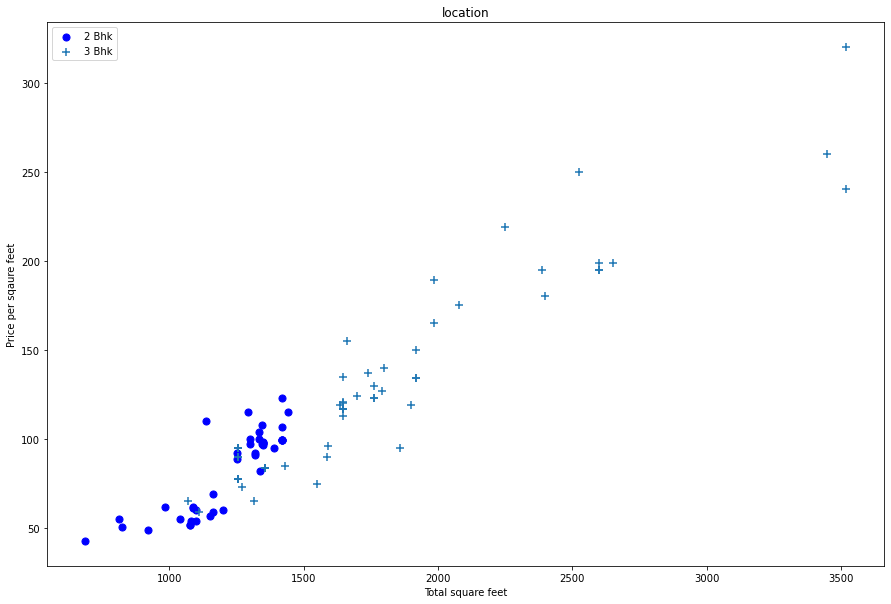

In [42]:
# So we should also not forget to check in the dataset that the property prices of same sqft area are more than he property prices of less bedrooms
#and we need to do the visualization of how many such cases we have

#lets try scatterplot function

def plot_scatter_chart(df,location):
    bhk2= df[(df.location==location) & (df.bhk==2)]
    bhk3= df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']= (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 Bhk', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',label='3 Bhk', s=50)
    plt.xlabel("Total square feet")
    plt.ylabel("Price per sqaure feet")
    plt.title("location")
    plt.legend()
    


plot_scatter_chart(clhp2,"Hebbal")

In [43]:
# NOW WE'LL CREATE A FUNCTON, WHAT IT WILL DO IS, IT WILL CALCULATE MEAN, STD, AND COUNT FOR 1BHK HOUSE AND FOR 2BHK.
#WHERE 2BHK PRICE WILL BE MORE THAN THAT OF 1BHK HOUSE. 

def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
             }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values) 
    return df.drop(exclude_indices,axis='index')
        
        
        
clhp3= remove_bhk_outliers(clhp2)
clhp3.shape

(7329, 7)

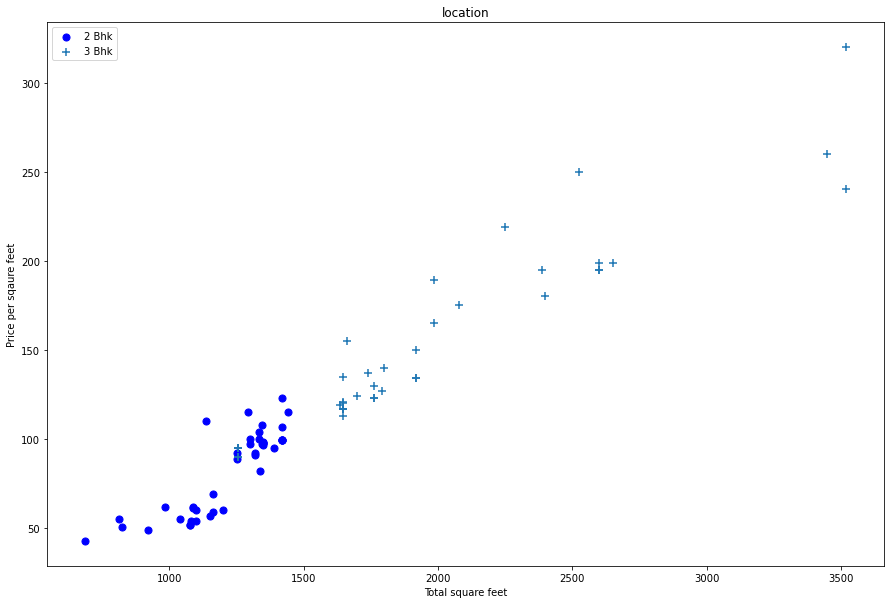

In [44]:
plot_scatter_chart(clhp3,"Hebbal")

Text(0, 0.5, 'count')

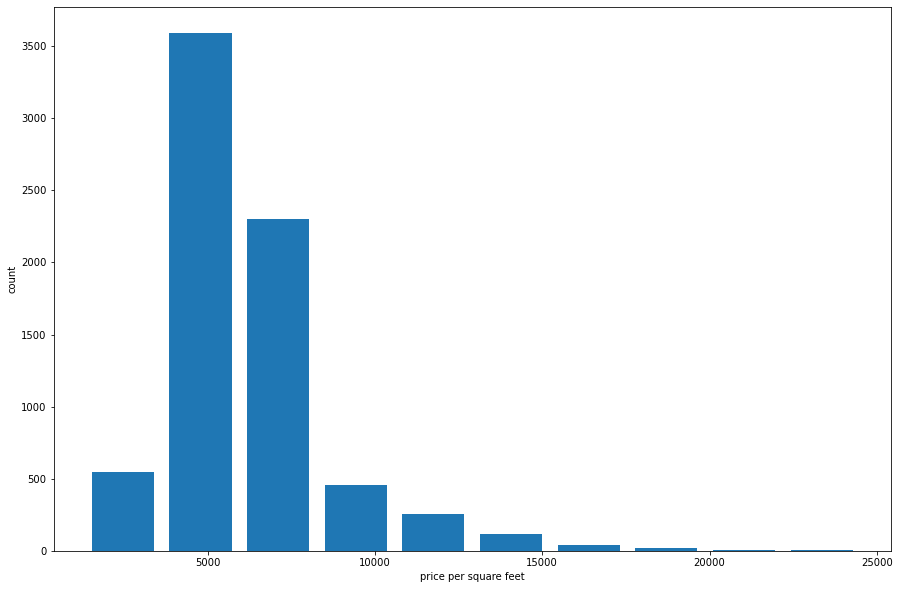

In [45]:
import matplotlib

plt.hist(clhp3.price_per_sqft,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

As we can see we have a majority of property on price per sqft from 0 to 1000 per sqft rupees range, We have majority of datapoints. 
And we can see that the dataset have bell curved shape. 
By that we can say our dataset has normal distribution.

In [46]:
#Lets explore bathrooms

clhp3.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
#houses which have more than 9 bathrooms

clhp3[clhp3.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


Sometimes we might get a thought of houses having bathrooms which are greater than bedrooms. Normally in 2 bhk we can have 2 or 3 bathrooms. If you have 2bhk and 4 bathrooms that is unusual.
So we'll also remove those outliers in further process. 


Text(0, 0.5, 'count')

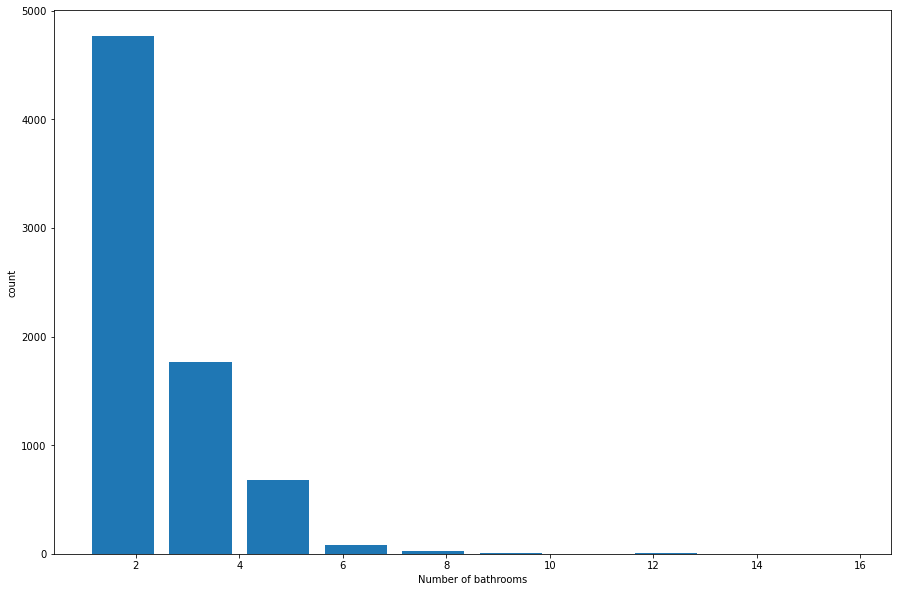

In [48]:
#plotting the histogram

plt.hist(clhp3.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")


In [49]:
#lets mark the outliers which are +2 bathrooms more than bedrooms

clhp3[clhp3.bath>clhp3.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


All of these are outliers whihc needs to be removed

In [50]:
clhp4= clhp3[clhp3.bath<clhp3.bhk+2]
clhp4.shape

(7251, 7)

# NOW MY DATASET LOOKS PRETTY MUCH CLEAN. SO LETS STARTS PREPARING FOR MACHINE LEARNING TRAINING

In [51]:
# BEFORE MOVING AHEAD LETS DROP MORE UNNECESSARY FEATURES BY CREATING NEW DATA FRAME

clhp5 = clhp4.drop(['size','price_per_sqft'],axis='columns')
clhp5.head(100)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
106,7th Phase JP Nagar,1180.0,2.0,72.0,2
110,7th Phase JP Nagar,1400.0,3.0,115.0,3
111,7th Phase JP Nagar,1270.0,2.0,83.0,2
113,7th Phase JP Nagar,2503.0,4.0,188.0,4


# MODEL BUILDING

We'll need to convert the clhp5 data into numeric , because machine learning cant predict the Text data. With the help of pandas dummy method

In [52]:
dummies= pd.get_dummies(clhp5.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
clhp6= pd.concat([clhp5, dummies.drop('others', axis='columns')],axis='columns')
clhp6.head(10)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
clhp7= clhp6.drop('location', axis='columns')
clhp7.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
clhp7.shape

(7251, 245)

In [78]:
#here I will creat X variable which will have only independent variables

X=  clhp7.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y= clhp7.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [58]:
#lets divide our data set and use  training dataset for model training, 
#and test dataset is to eveluate model perfomance

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874301

#pretty decent score it is 84%

# k-fold cross validation method

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X,y, cv=cv)


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

# Other techniques

# GRIDSEARCHCV

In [72]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_gridsearchcv(X,y):
    algos= {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize': [True,False]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores= []
    cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs= GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.743538,"{'criterion': 'mse', 'splitter': 'random'}"


The above function will tell me which algorithm is good. It is a time saver

In [79]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

# PROPERTY PRICE PREDICTION 

In [65]:
#predict price function


def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [66]:
predict_price('1st Phase JP Nagar',1000,2, 2)

83.4990467717485

In [67]:
predict_price('1st Phase JP Nagar',1000,2, 3)

81.72616900750309

In [68]:
predict_price('Indira Nagar',1000,3, 3)

184.58430202033497

# Time to export our model to pickel file

In [76]:
import pickle
with open('Bengaluru_House_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [77]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))